In [1]:
#  Почистить
#  Обновить пути сохранения
#
#  Добавить аннотацию
#  
#

In [2]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *

In [3]:
# Loading data
out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/{NAME_NON_FILTERING_BRCA}', sep="\t")
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/OHSU_BRCA_NEW/{NAME_FILTERING_BRCA}', sep=";")

## ORIGINAL FIRST


In [4]:
# Import requirements for fonts
import matplotlib
matplotlib.rcParams.update({'font.size':4})
import math

In [5]:
# Processing tables & save tables
out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
if PLOT_SORT_BY =='x-axis sorted by size of intersection':
    # Pandas sorting by intersection
    first_df.sort_values(by=['sample','size_intersection'], inplace = True, ascending=[False,False])
final_df = first_df

# Adding sum for simple filtration
out_df_filtered.insert(loc=4,column='sum',value=final_df['size_intersection']+final_df['size_ohsu\eth']+final_df['size_eth\ohsu'])
out_df_filtered.head()
if not OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FINAL_BRCA])
if OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

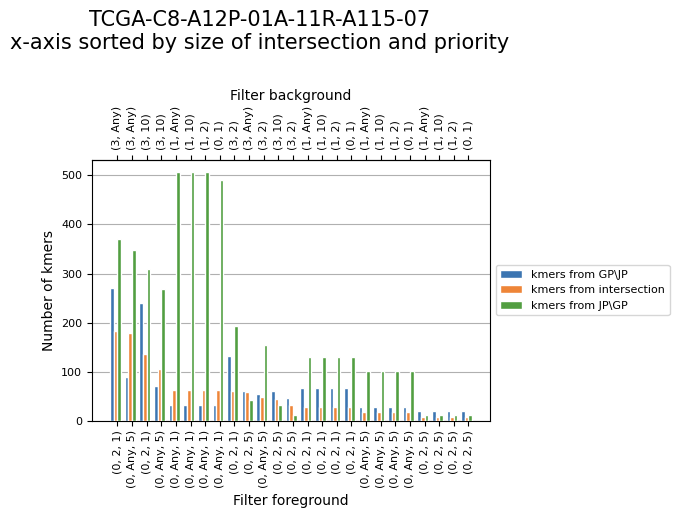

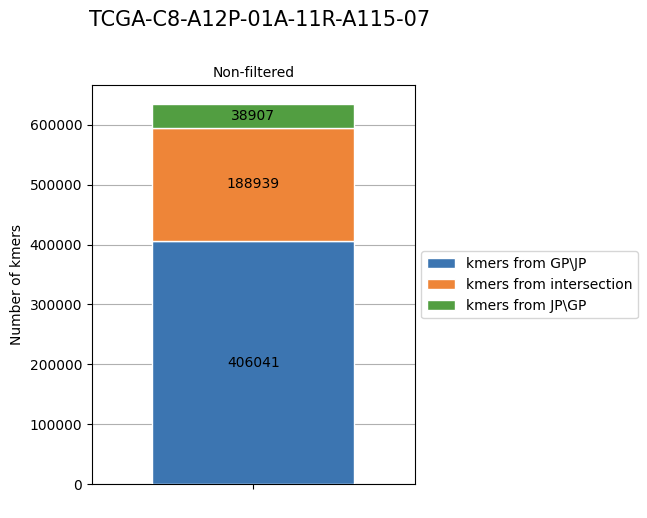

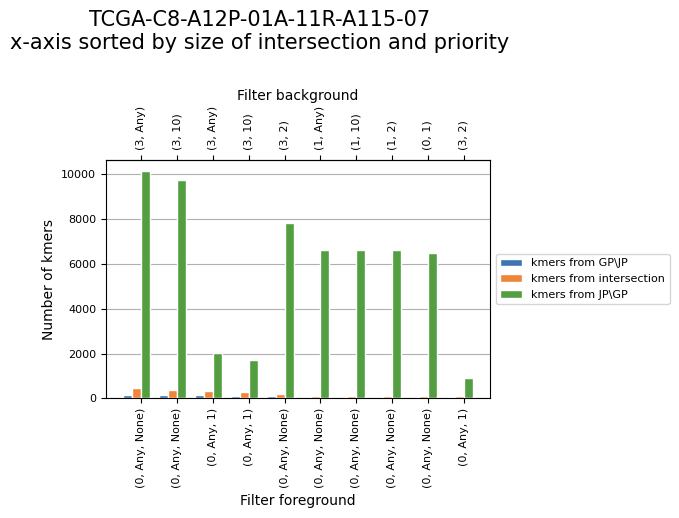

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

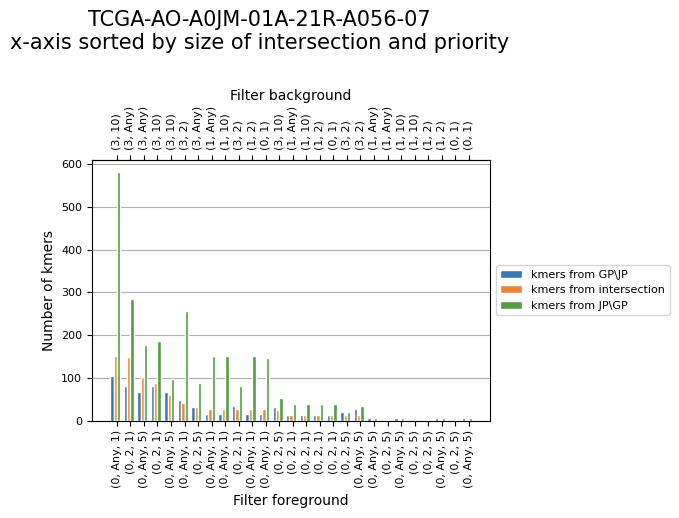

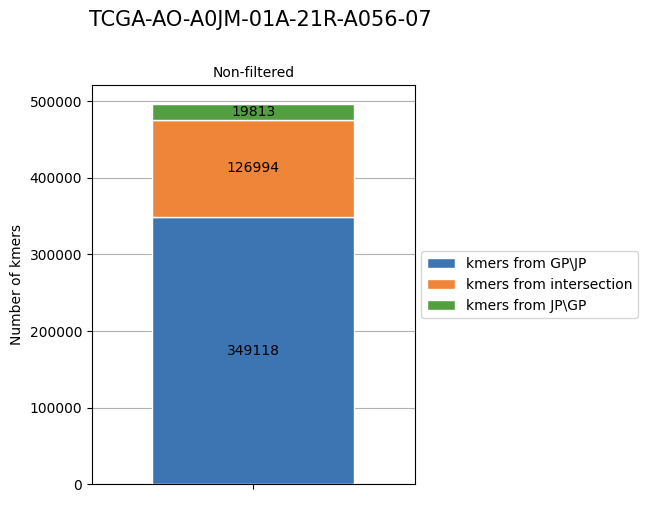

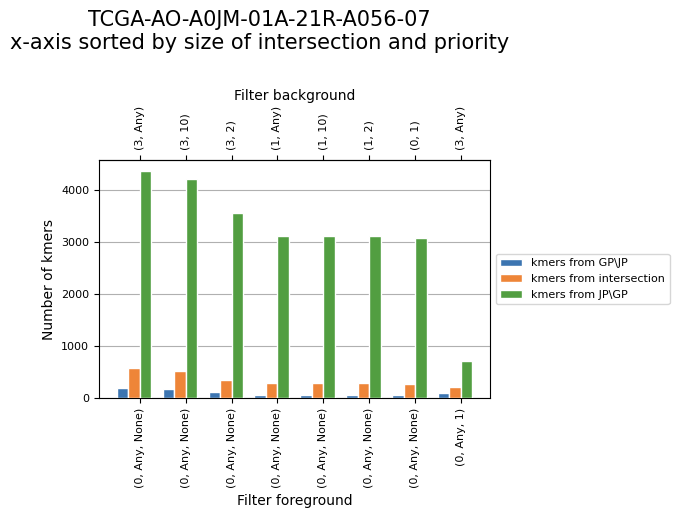

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

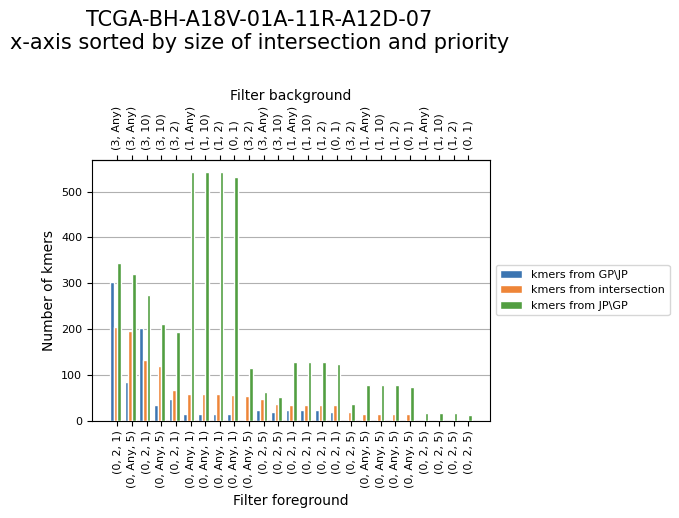

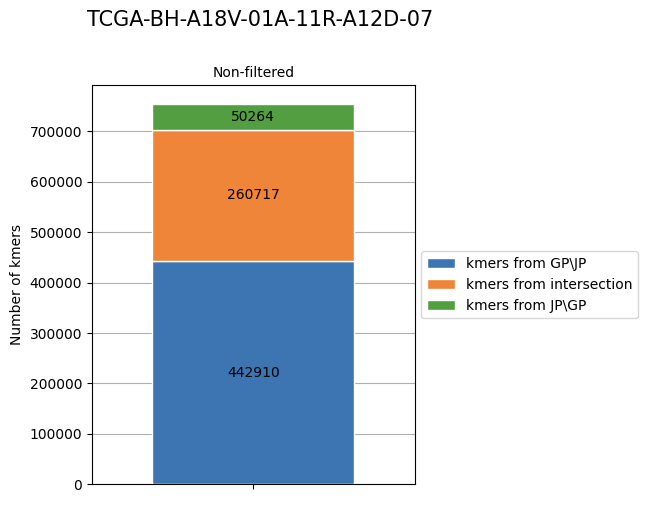

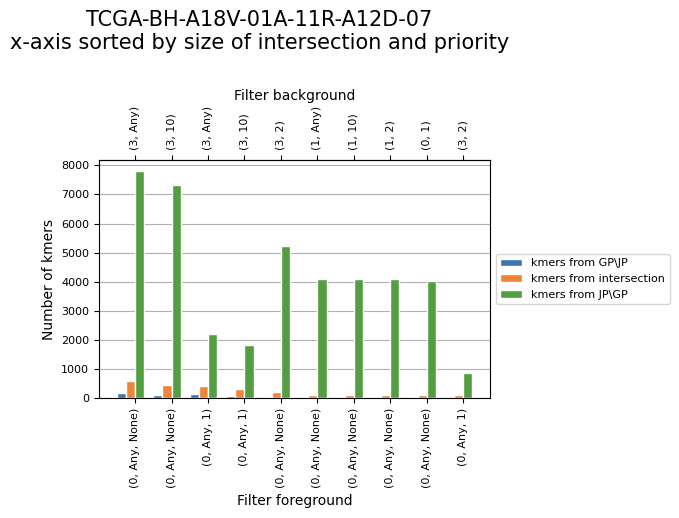

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

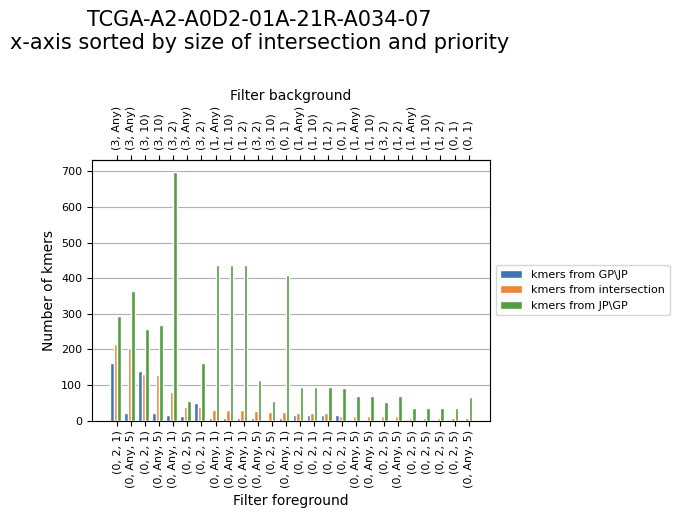

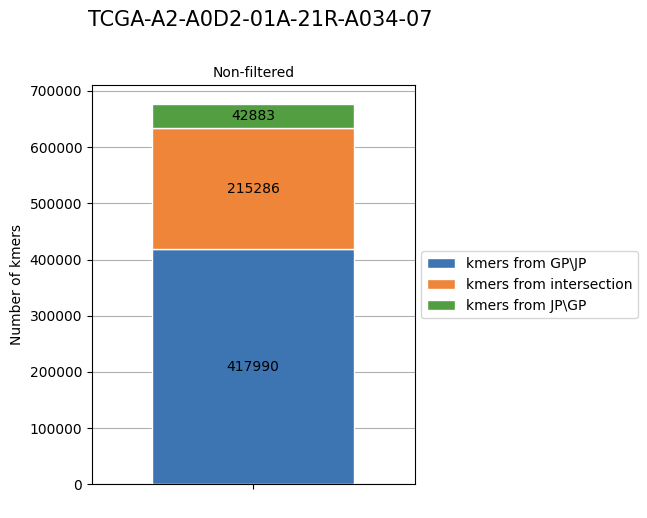

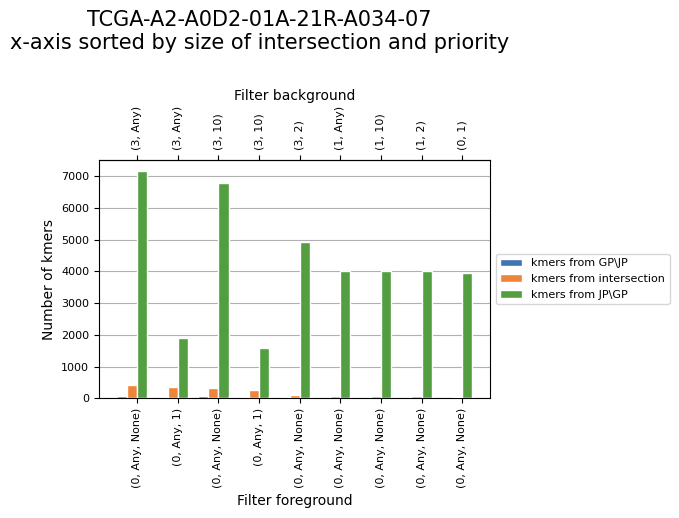

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

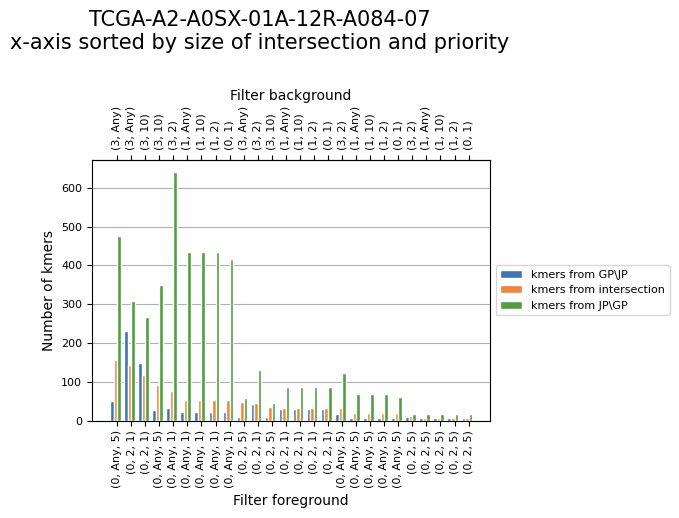

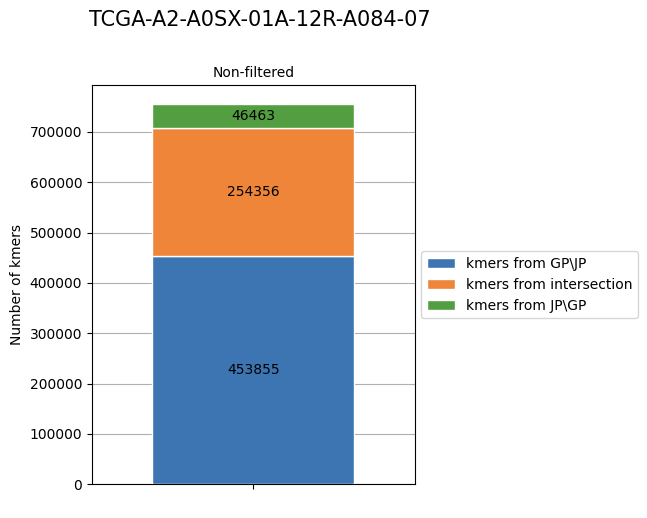

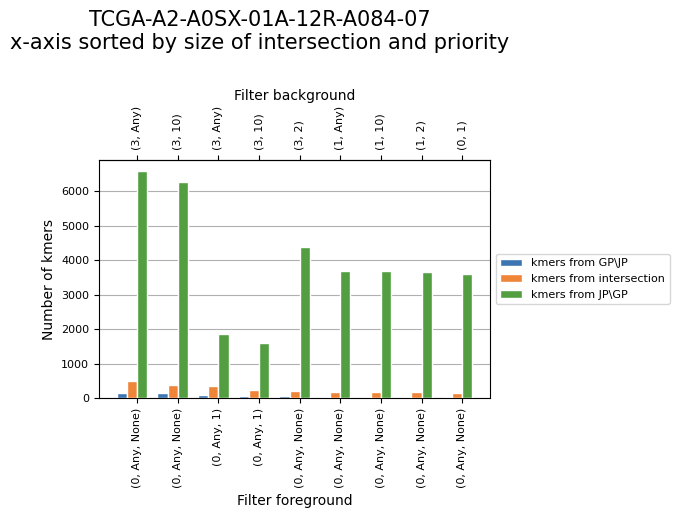

In [6]:

import matplotlib
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math        
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.


out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
    
final_df = first_df

if not OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FINAL_BRCA])
elif OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    data_df_first = final_df.loc[(final_df['sample']==sample)&(final_df['sum']<1000)]
    data_df_second = final_df.loc[(final_df['sample']==sample)&(final_df['sum']>=1000)]
    data_df_first=table_processing.sorting(data_df_first)
    data_df_second=table_processing.sorting(data_df_second)
    inter_first=list(data_df_first['size_intersection'])
    s_ETH_first=list(data_df_first['size_eth\ohsu'])
    s_OHSU_first=list(data_df_first['size_ohsu\eth'])
    
    inter_first=list(data_df_first['size_intersection'])
    s_ETH_first=list(data_df_first['size_eth\ohsu'])
    s_OHSU_first=list(data_df_first['size_ohsu\eth'])
    
    filter_foreground_first = list(data_df_first['filter_foreground'])
    filter_background_first = list(data_df_first['filter_background'])
    
    inter2=list(second_df['size_intersection'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']

    inter_second=list(data_df_second['size_intersection'])
    s_ETH_second=list(data_df_second['size_eth\ohsu'])
    s_OHSU_second=list(data_df_second['size_ohsu\eth'])
    filter_foreground_second = list(data_df_second['filter_foreground'])
    filter_background_second = list(data_df_second['filter_background'])
    ySalt=''
    
    l=len(s_ETH_first)
    l3=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first)
    filbac_first = table_processing.get_filter(filter_background_first)
    filfor_second = table_processing.get_filter(filter_foreground_second)
    filbac_second = table_processing.get_filter(filter_background_second)
        

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['kmers from GP\JP', 'kmers from intersection', 'kmers from JP\GP']
    v_first=[s_ETH_first, inter_first, s_OHSU_first]
    v_second=[s_ETH_second, inter_second, s_OHSU_second]
    
    axis2 = {
            'kmers from GP\JP':s_ETH2,
            'kmers from intersection':inter2,
            'kmers from JP\GP':s_OHSU2
            }
    lg_first = len(filfor_first)
    lg2 = len(filfor2)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary2 = filbac2
    x_secondary_second = filbac_second
    
    plt.figure()

    bottom_first =np.zeros(lg_first)
    bottom2 =np.zeros(lg2)
    bottom_second =np.zeros(lg_second)
    bar_width=0.5
    bar_position_ETH_first = range(len(s_ETH_first))

    bar_position_ETH2 = range(len(axis2['kmers from GP\JP']))

    bar_position_ETH_second = range(len(s_ETH_second))

    SALT=salt=PLOT_SORT_BY
    
    path_sample_m1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_m1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_l1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_L1000+PDF])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_l1000,path_sample_l1000_pdf,coor=False)

    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf,coor=False)
    # Plot 3

    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_m1000,path_sample_m1000_pdf,coor=False)


/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

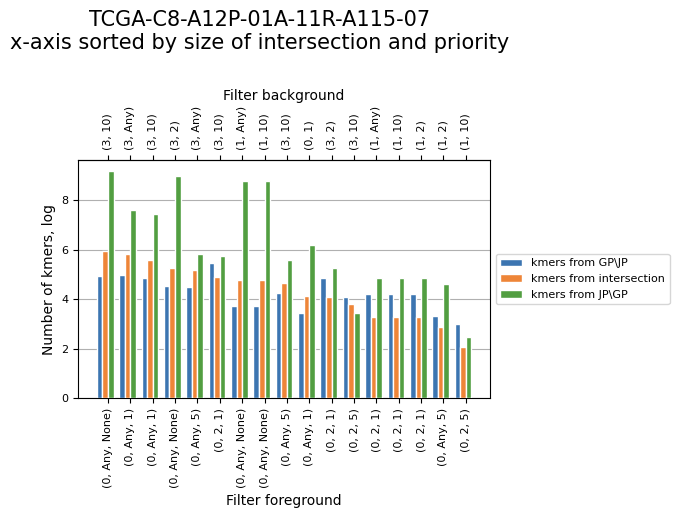

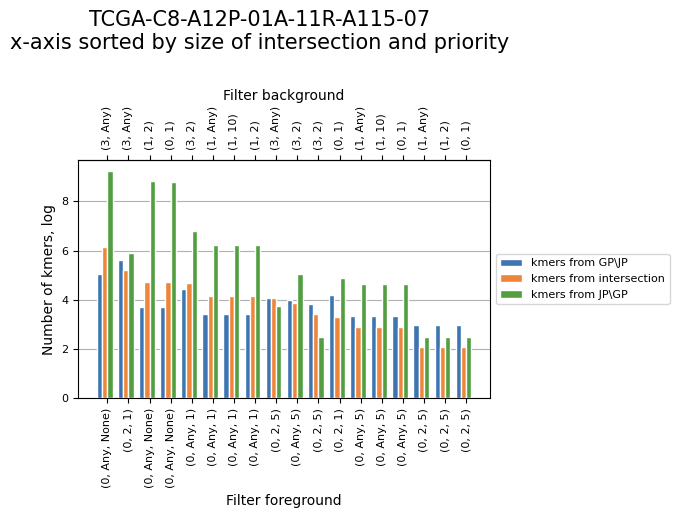

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])
/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2023b/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

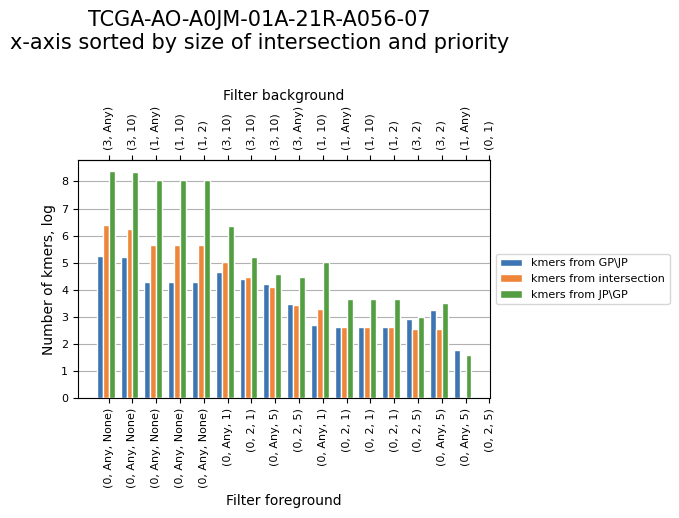

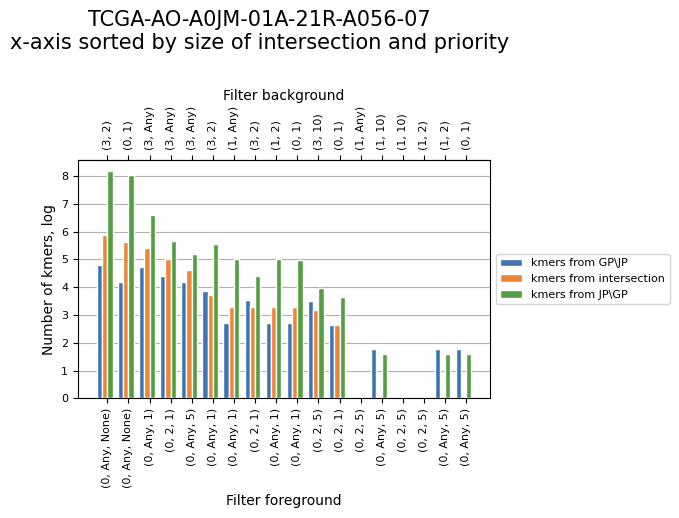

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])
/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2023b/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

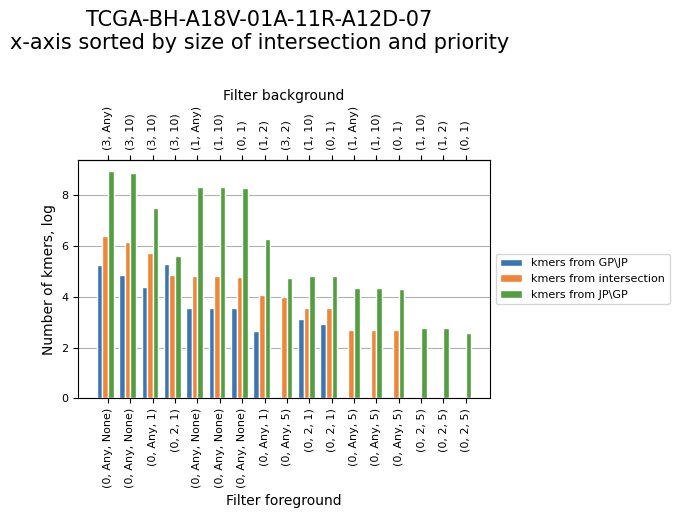

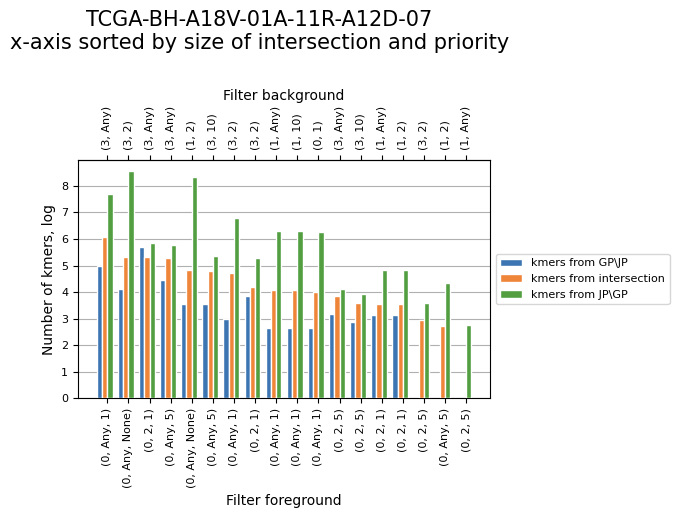

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])
/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2023b/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

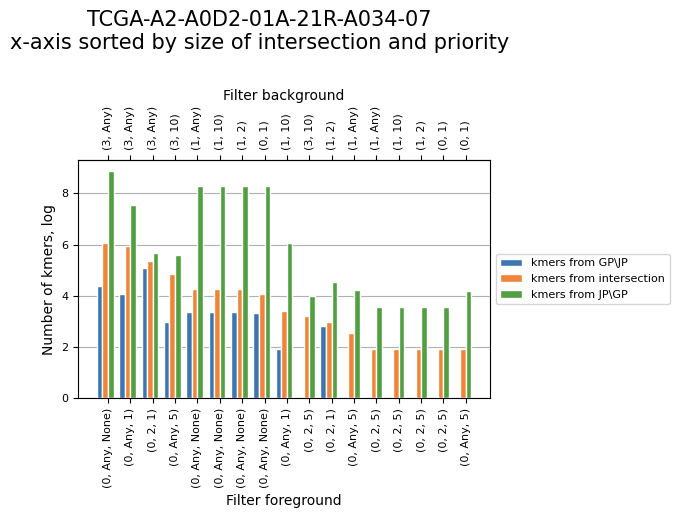

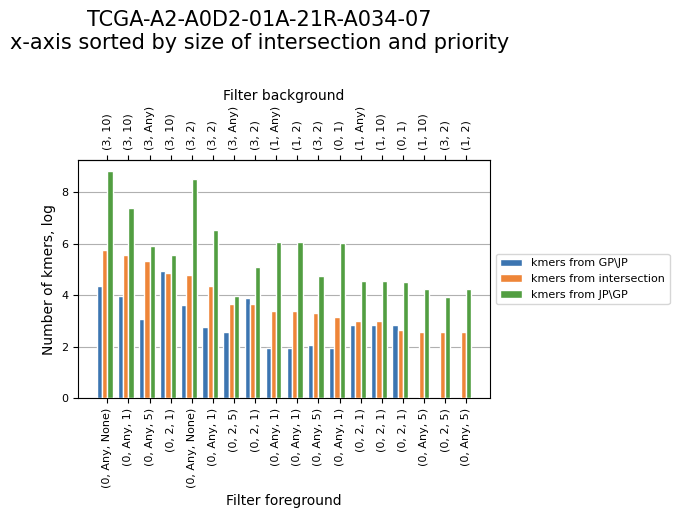

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

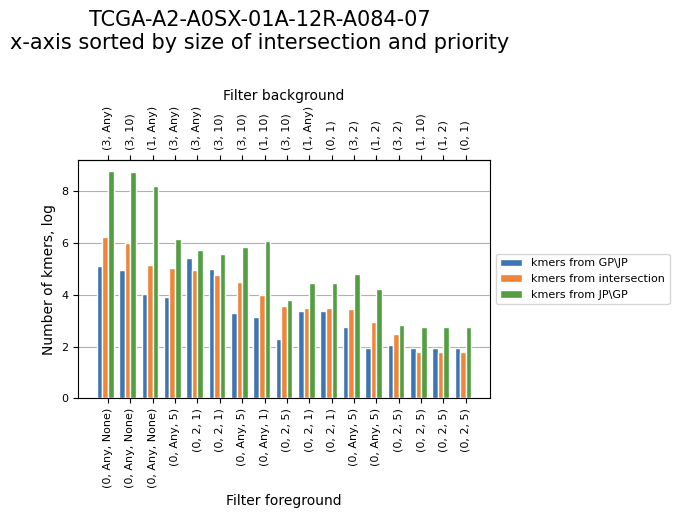

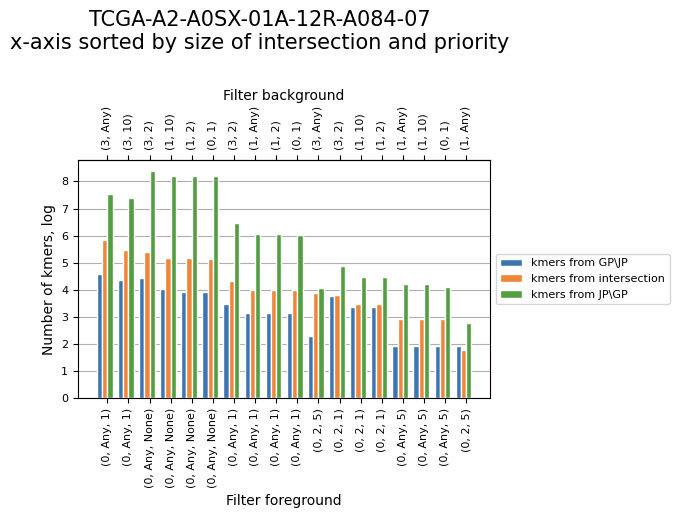

In [8]:
#WITH LOG
import matplotlib
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.

out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
    
final_df = first_df

if not OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FINAL_BRCA])
elif OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    final_df_new = final_df.loc[final_df['sample']==sample]
    
    data_df_first = final_df_new.iloc[:final_df_new['sample'].count()//2]
    data_df_second = final_df_new.iloc[final_df_new['sample'].count()//2:]
    
    data_df_first=table_processing.sorting(data_df_first)
    data_df_second=table_processing.sorting(data_df_second)
    inter_first=np.log(data_df_first['size_intersection'])
    s_ETH_first=np.log(data_df_first['size_eth\ohsu'])
    s_OHSU_first=np.log(data_df_first['size_ohsu\eth'])
    
    filter_foreground_first = list(data_df_first['filter_foreground'])
    filter_background_first = list(data_df_first['filter_background'])


    inter_second=np.log(data_df_second['size_intersection'])
    s_ETH_second=np.log(data_df_second['size_eth\ohsu'])
    s_OHSU_second=np.log(data_df_second['size_ohsu\eth'])
    filter_foreground_second = list(data_df_second['filter_foreground'])
    filter_background_second = list(data_df_second['filter_background'])
    ySalt=', log'
    
    l=len(s_ETH_first)
    l3=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first)
    filbac_first = table_processing.get_filter(filter_background_first)
    filfor_second = table_processing.get_filter(filter_foreground_second)
    filbac_second = table_processing.get_filter(filter_background_second)
        

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['kmers from GP\JP', 'kmers from intersection', 'kmers from JP\GP']
    v_first=[s_ETH_first, inter_first, s_OHSU_first]
    v_second=[s_ETH_second, inter_second, s_OHSU_second]
    
    lg_first = len(filfor_first)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary_second = filbac_second
    
    plt.figure()

    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    SALT=salt=PLOT_SORT_BY
    
    path_sample_m1000_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_m1000_pdf_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM,NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_l1000_pdf_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM,NAME_PLOT_ABSOLUT_PRETTY_L1000+PDF])
    
    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_l1000_log,path_sample_l1000_pdf_log,coor=False,ySalt=ySalt)

    # Plot 3

    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_m1000_log,path_sample_m1000_pdf_log,coor=False,ySalt=ySalt)
